# Test: Minimum error discrimination

In this notebook we are testing the evolution of the error probability with the number of evaluations.

In [1]:
import sys

sys.path.append('../../')

import itertools
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from qiskit.algorithms.optimizers import SPSA
from qnn.quantum_neural_networks import StateDiscriminativeQuantumNeuralNetworks as nnd
from qnn.quantum_state import QuantumState

plt.style.use('ggplot')

In [2]:
def callback(params, results, prob_error, prob_inc, prob):
    data.append(prob_error)

In [6]:
# Create random states
ψ = QuantumState.random(1)
ϕ = QuantumState.random(1)

# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2 = [0], [pi]
th_v1, th_v2 = [0], [0]
fi_v1, fi_v2 = [0], [0]
lam_v1, lam_v2 = [0], [0]
params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

# Initialize Discriminator
discriminator = nnd([ψ, ϕ])
data = []
results = discriminator.discriminate(SPSA(100), params, callback=callback)
optimal = nnd.helstrom_bound(ψ, ϕ)

print(f'Optimal results: {optimal}\nActual results: {results}')

Optimal results: 0.1842391754983393
Actual results: (array([-1.00757705e+00,  3.32056507e+00,  1.16330850e+00,  1.98082431e-03,
        3.23876708e+00, -1.86481792e+00, -2.30335836e+00, -9.06714945e-01,
       -1.46201088e+00,  1.96589739e-01,  4.87138113e-01]), 0.177734375, 200)


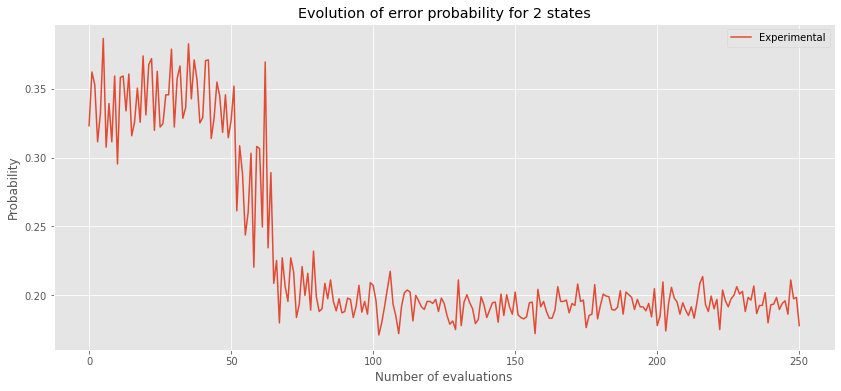

In [7]:
fig = plt.figure(figsize=(14, 6))
plt.plot(data, '-')
plt.xlabel('Number of evaluations')
plt.ylabel('Probability')
plt.legend(['Experimental'])
plt.title('Evolution of error probability for 2 states')
fig.savefig('twostates.png')
plt.show()

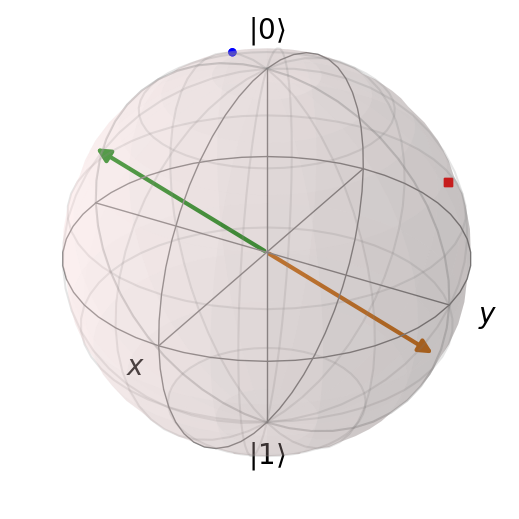

In [10]:
th_u, fi_u, lam_u = results[0][:3]
th1 = results[0][3]
th2 = results[0][4]
th_v1 = results[0][5]
th_v2 = results[0][6]
fi_v1 = results[0][7]
fi_v2 = results[0][8]
lam_v1 = results[0][9]
lam_v2 = results[0][10]

M = nnd.povm( 2,
             [th_u], [fi_u], [lam_u],
             [th1], [th2],
             [th_v1], [th_v2],
             [fi_v1], [fi_v2],
             [lam_v1], [lam_v2], output='povm' )
plt.style.use('default')
sphere = nnd.plot_bloch_sphere( M , [ψ, ϕ] )
sphere.render()
plt.savefig('sphere_2_states')
plt.style.use('ggplot')

In [16]:
# Create random states
ψ = QuantumState.random(1)
ϕ = QuantumState.random(1)
χ = QuantumState.random(1)

# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2 = 2 * [0], 2 * [pi]
th_v1, th_v2 = 2 * [0], 2 * [0]
fi_v1, fi_v2 = 2 * [0], 2 * [0]
lam_v1, lam_v2 = 2 * [0], 2 * [0]
params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

# Initialize Discriminator
discriminator = nnd([ψ, ϕ, χ])
data = []
results = discriminator.discriminate(SPSA(100), params, callback=callback)

print(f'Results: {results}')

Results: (array([ 1.10538359, -1.70015769, -0.48348853, -2.11682256, -0.03103935,
        3.19922651,  3.11729522,  0.31810485, -0.13160315, -0.18140742,
       -0.76371755,  0.27253825,  0.03474263,  0.01515616, -0.5763371 ,
        0.10982771,  1.07646142, -0.01327666, -0.93122126]), 0.4046223958333333, 200)


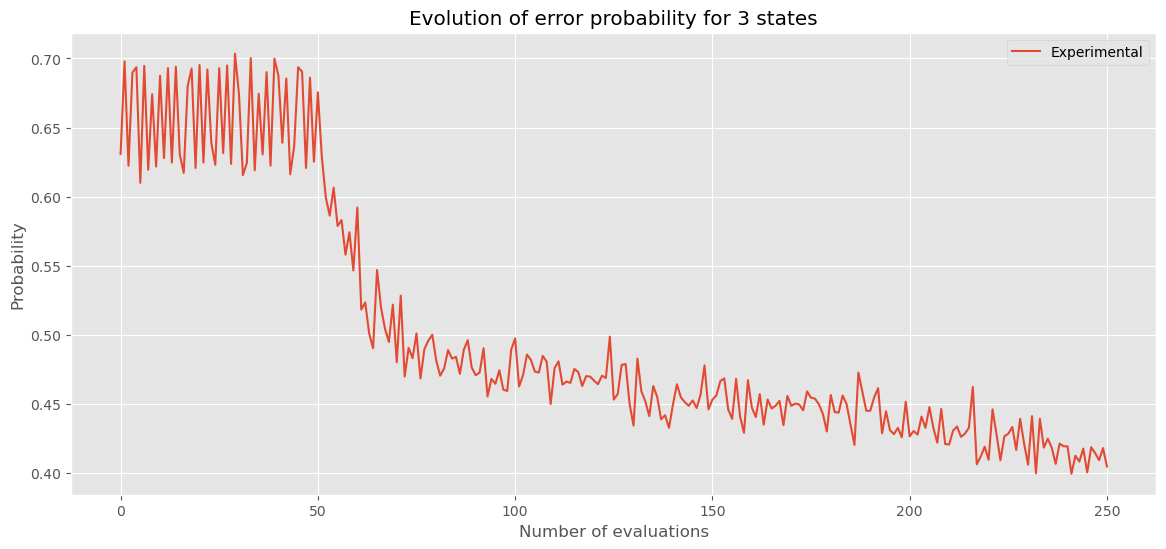

In [17]:
fig = plt.figure(figsize=(14, 6))
plt.plot(data, '-')
plt.xlabel('Number of evaluations')
plt.ylabel('Probability')
plt.legend(['Experimental'])
plt.title('Evolution of error probability for 3 states')
fig.savefig('3states.png')
plt.show()

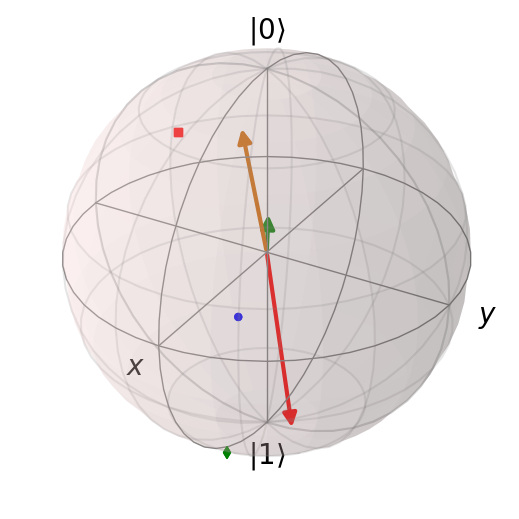

In [19]:
th_u, fi_u, lam_u = results[0][:3]
th1 = results[0][3:5]
th2 = results[0][5:7]
th_v1 = results[0][7:9]
th_v2 = results[0][9:11]
fi_v1 = results[0][11:13]
fi_v2 = results[0][13:15]
lam_v1 = results[0][15:17]
lam_v2 = results[0][17:19]

M = nnd.povm( 3,
             [th_u], [fi_u], [lam_u],
             th1, th2,
             th_v1, th_v2,
             fi_v1, fi_v2,
             lam_v1, lam_v2, output='povm' )
plt.style.use('default')
sphere = nnd.plot_bloch_sphere( M , [ψ, ϕ, χ] )
sphere.render()
plt.savefig('sphere_3_states.png')
plt.style.use('ggplot')

In [12]:
# Create random states
ψ = QuantumState([ np.array([1,0]) ])
ϕ = QuantumState([ np.array([np.cos(np.pi/4), np.sin(np.pi/4)]), 
                  np.array([np.cos(0.1+np.pi/4),np.sin(0.1+np.pi/4)] ) ])
χ = QuantumState([ np.array([np.cos(np.pi/4), 1j*np.sin(np.pi/4)]), 
                  np.array([np.cos(0.1+np.pi/4), 1j*np.sin(0.1+np.pi/4)] ),
                  np.array([np.cos(-0.1+np.pi/4), 1j*np.sin(-0.1+np.pi/4)] )])

# Parameters
th_u, fi_u, lam_u = list(np.pi*np.random.randn(1)), list(np.pi*np.random.randn(1)), list(np.pi*np.random.randn(1))
th1, th2 = list(np.pi*np.random.randn(2)), list(np.pi*np.random.randn(2))
th_v1, th_v2 = list(np.pi*np.random.randn(2)), list(np.pi*np.random.randn(2))
fi_v1, fi_v2 = list(np.pi*np.random.randn(2)), list(np.pi*np.random.randn(2))
lam_v1, lam_v2 = list(np.pi*np.random.randn(2)), list(np.pi*np.random.randn(2))
params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

# Initialize Discriminator
discriminator = nnd([ψ, ϕ, χ])
data = []
results = discriminator.discriminate(SPSA(100), params, callback=callback)

print(f'Results: {results}')

Results: (array([ 9.81810357,  0.59561506, -1.36035727,  3.18600335, -2.84531461,
        0.99830421, -5.75338446, -0.4057666 , -3.25167801, -4.81894089,
       -6.46027888, -1.67360266, -1.92398161,  1.14189749,  5.38115967,
       -1.12673158,  2.53992157,  0.28855823,  1.09164108]), 0.4171549479166666, 200)


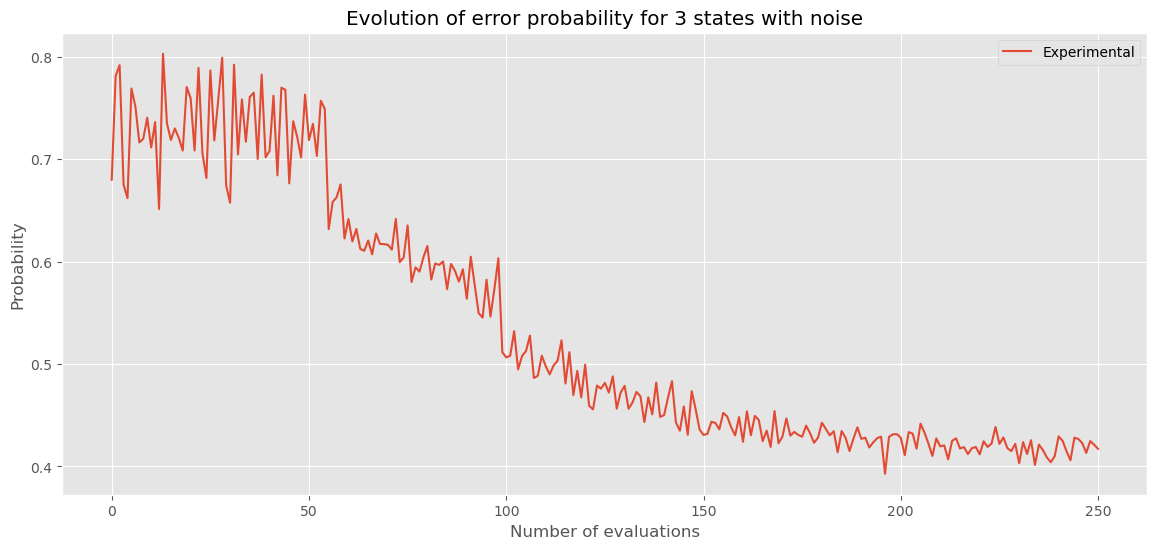

In [13]:
fig = plt.figure(figsize=(14, 6))
plt.plot(data, '-')
plt.xlabel('Number of evaluations')
plt.ylabel('Probability')
plt.legend(['Experimental'])
plt.title('Evolution of error probability for 3 states with noise')
fig.savefig('noisy.png')
plt.show()

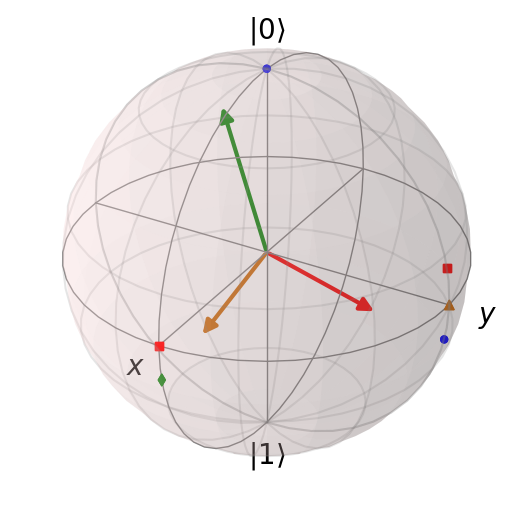

In [15]:
th_u, fi_u, lam_u = results[0][:3]
th1 = results[0][3:5]
th2 = results[0][5:7]
th_v1 = results[0][7:9]
th_v2 = results[0][9:11]
fi_v1 = results[0][11:13]
fi_v2 = results[0][13:15]
lam_v1 = results[0][15:17]
lam_v2 = results[0][17:19]

M = nnd.povm( 3,
             [th_u], [fi_u], [lam_u],
             th1, th2,
             th_v1, th_v2,
             fi_v1, fi_v2,
             lam_v1, lam_v2, output='povm' )
plt.style.use('default')
sphere = nnd.plot_bloch_sphere( M , [ψ, ϕ, χ] )
sphere.render()
plt.savefig('sphere_3_states_noisy.png')
plt.style.use('ggplot')